In [1]:
import os
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import packages.definitions as d

files = os.listdir(d.PLL_DATA_DIR)
paths = [f"{d.PLL_DATA_DIR}/{x}" for x in files]

def path_to_df(path: str) -> pd.DataFrame:
    date_str = os.path.splitext(os.path.basename(path))[0]
    df = pd.read_json(path)
    df["date"] = dt.datetime.strptime(date_str, "%Y-%m-%d")
    return df

dfs = [path_to_df(x) for x in paths]
df = pd.concat(dfs).reset_index(drop=True)

stat = df.groupby("pll")["time"].describe()
stat.sort_values("50%")


,count,mean,std,min,25%,50%,75%,max
pll,,,,,,,,
T,62.0,4.865968,1.622884,3.47,4.2525,4.555,4.9750,16.13
Ua,63.0,5.129206,1.579486,3.15,4.2300,4.650,5.6550,11.50
Jb,58.0,5.673276,1.194168,3.99,4.8150,5.430,6.1350,9.98
Y,35.0,5.681714,1.502299,3.65,4.8650,5.490,6.1200,10.58
F,52.0,5.768462,0.999147,4.38,5.0975,5.595,6.1450,9.48
H,51.0,6.327843,3.825941,4.02,5.3200,5.710,6.6050,32.24
Ub,46.0,6.523913,5.520013,4.03,4.9025,5.745,6.4575,42.52
Aa,72.0,6.128889,1.141297,4.32,5.4075,5.945,6.7050,10.29
Gc,54.0,6.392778,1.393446,4.83,5.4600,5.990,6.9775,12.66


## latest

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


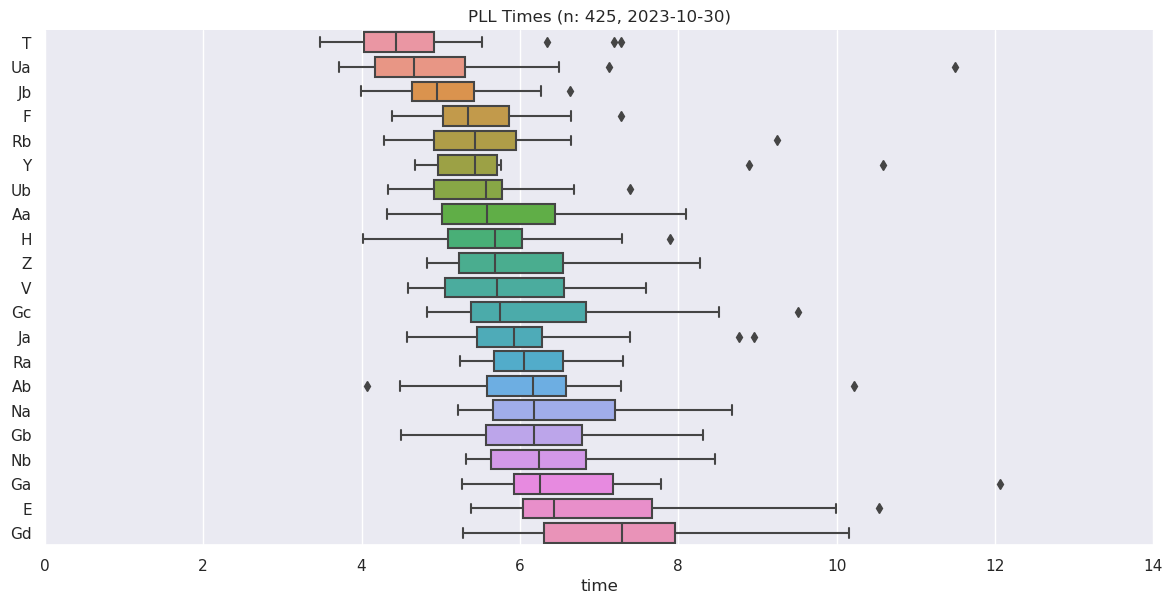

In [2]:
latest_date = df["date"].max()
df_latest = df[df["date"] == latest_date]

sns.set_theme()

g = sns.catplot(
    data=df_latest,
    x="time",
    y="pll",
    order=df_latest.groupby("pll")["time"].describe().sort_values("50%").index,
    kind="box",
    height=6,
    aspect=2,
)

g.set(
    title=f"PLL Times (n: {len(df_latest)}, {latest_date.date()})",
    ylabel="",
    xlim=(0, 14),
)

plt.show()


## full

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


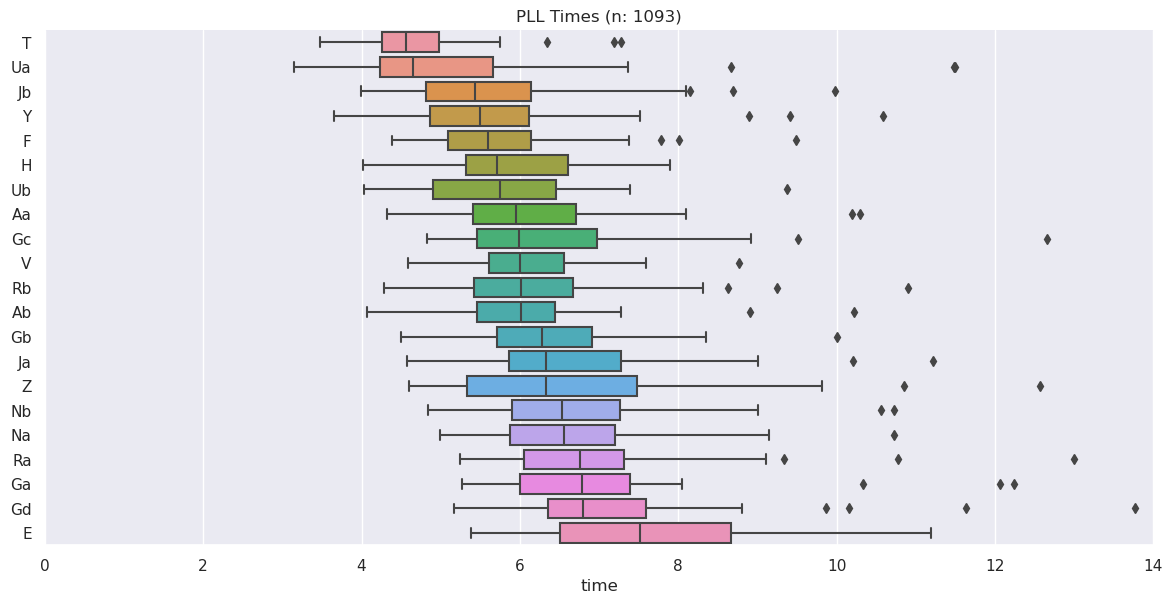

In [3]:
sns.set_theme()

g = sns.catplot(
    data=df,
    x="time",
    y="pll",
    order=df.groupby("pll")["time"].describe().sort_values("50%").index,
    kind="box",
    height=6,
    aspect=2,
)

g.set(
    title=f"PLL Times (n: {len(df)})",
    ylabel="",
    xlim=(0, 14),
)

plt.show()


## transition

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


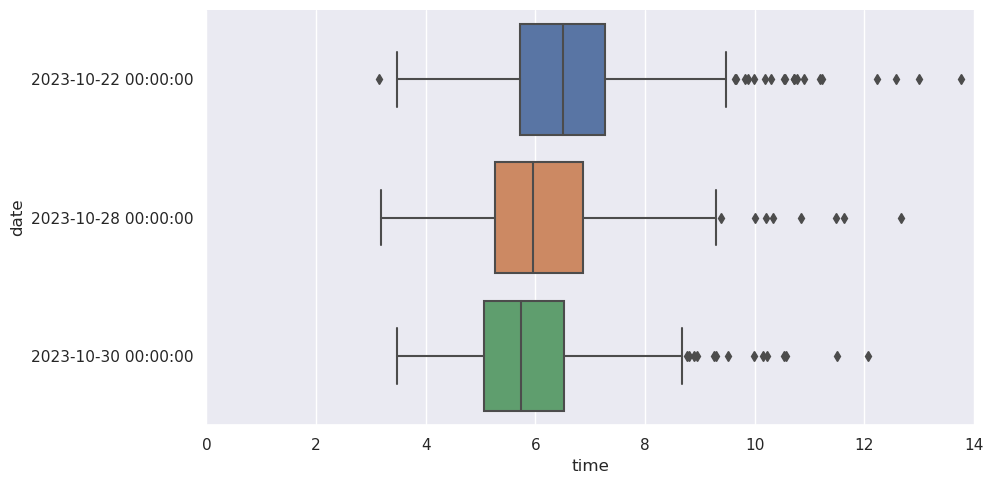

In [6]:
sns.set_theme()

g = sns.catplot(
    data=df,
    x="time",
    y="date",
    kind="box",
    aspect=2,
)

g.set(
    xlim=(0, 14),
)

plt.show()


/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


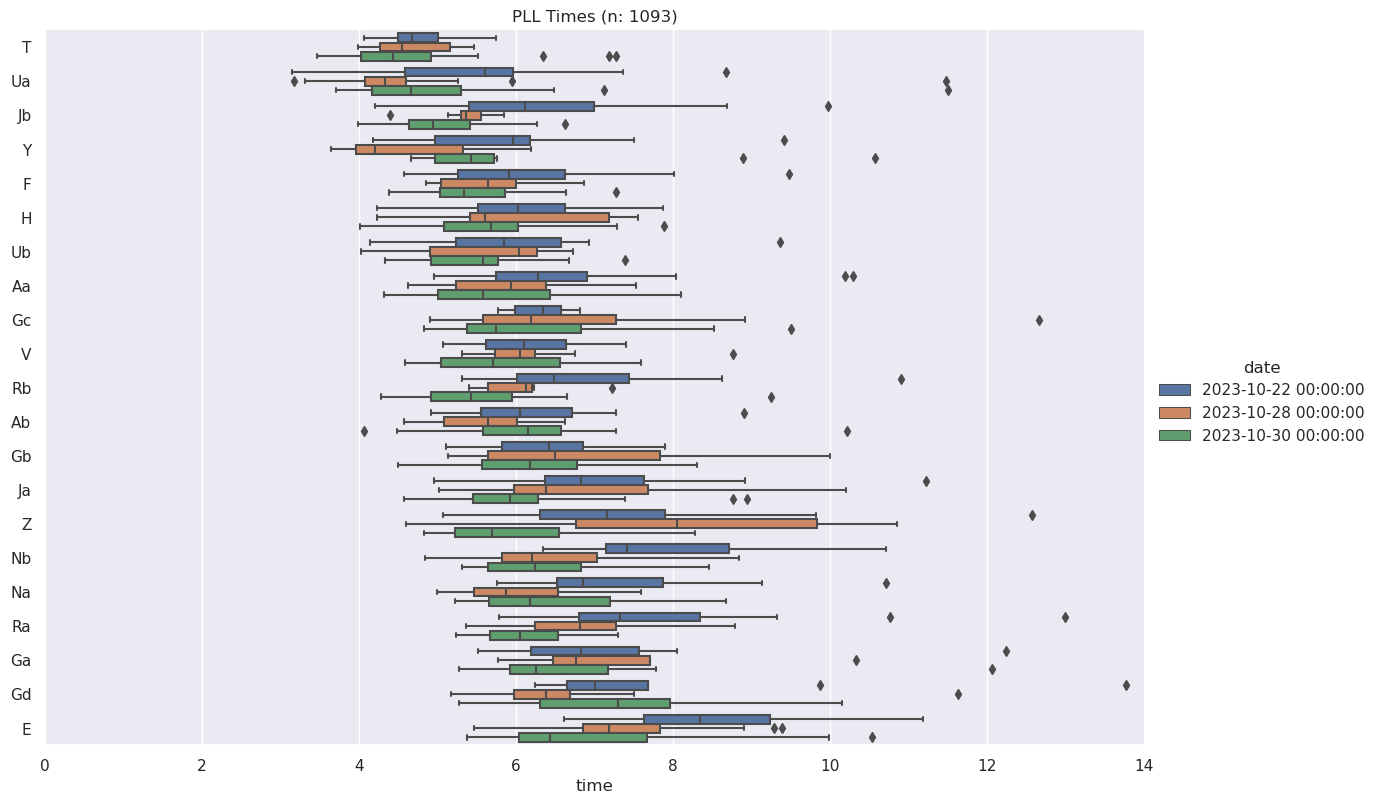

In [5]:
sns.set_theme()

g = sns.catplot(
    data=df,
    x="time",
    y="pll",
    order=df.groupby("pll")["time"].describe().sort_values("50%").index,
    hue="date",
    kind="box",
    height=8,
    aspect=1.5,
)

g.set(
    title=f"PLL Times (n: {len(df)})",
    ylabel="",
    xlim=(0, 14),
)

plt.show()
